In [3]:
%pylab inline

ImportError: No module named 'matplotlib'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

ImportError: No module named 'pandas'

In [4]:
#Reading the dataset in a dataframe using Pandas
df_train = pd.read_csv("./sources/train.csv") 
df_test = pd.read_csv("./sources/test.csv") 

NameError: name 'pd' is not defined

In [4]:
#Have a look at the top rows for general idea
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# get the summary of numerical variables
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


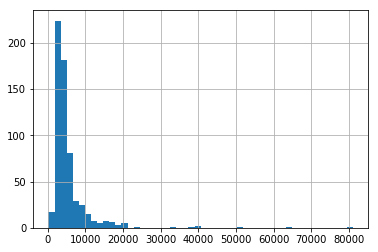

In [6]:
# Plot the histogram of ApplicantIncome 
df_train['ApplicantIncome'].hist(bins=50)

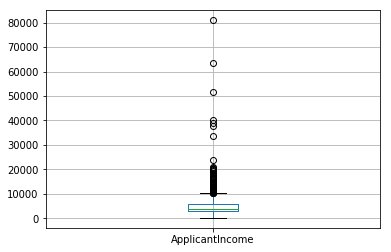

In [7]:
# plot the histogram of ApplicantIncome using box plot to better understand the distributions
df_train.boxplot(column='ApplicantIncome')

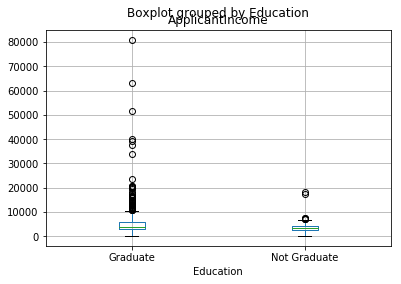

In [8]:
# the box plot confirms the presence of a lot of outliers/extreme values
# It can be driven by the fact that we are looking at people with different education levels
# box plot and segregate by education:
df_train.boxplot(column='ApplicantIncome', by = 'Education')

In [9]:
# we can see there is no substantial difference between the mean income of graduate and non-graduates. 
# But there are a higher number of graduates with very high incomes

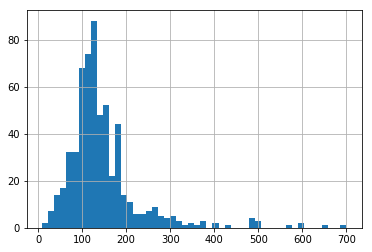

In [10]:
#Plot the histogram of LoanAmount
df_train['LoanAmount'].hist(bins=50)

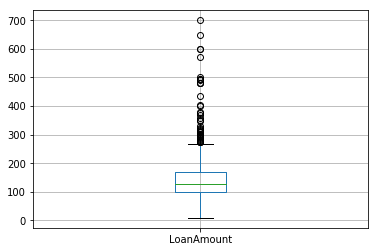

In [11]:
# plot the histogram of LoanAmount using box plot to better understand the distributions
df_train.boxplot(column='LoanAmount')

In [12]:
# There are some extreme values here too
# Both ApplicantIncome and LoanAmount require some amount of data munging

In [13]:
# Get the number of missing values in each column 
df_train.apply(lambda x: sum(x.isnull()),axis=0) 
df_test.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
# For missing data in Self_Employed, check which is the common value
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
# About 86% values are "No" for "Self_Employed" 
# We'll fill all missing data of Self_Employed with "No" since it's safe
df_train['Self_Employed'].fillna('No',inplace=True)
df_test['Self_Employed'].fillna('No',inplace=True)

In [16]:
# Create a Pivot table, which provides the median values for all the groups of unique values of Self_Employed and Education
table = df_train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [17]:
# Define a function which returns the values of these cells
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [18]:
# Replace missing cells using by applying the function
df_train['LoanAmount'].fillna(df_train[df_train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [19]:
# Get the number of missing values in each column 
df_train.apply(lambda x: sum(x.isnull()),axis=0) 
df_test.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
# We still have to fill the missing data of Gender, Married, 
# Dependents, Loan_Amount_Term, and Credit_History 

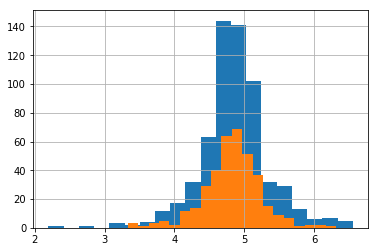

In [21]:
# Since the extreme values of LoanAmount are practically possible
# instead of treating them as outliers, log transformation to nullify their effectv
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['LoanAmount_log'].hist(bins=20)

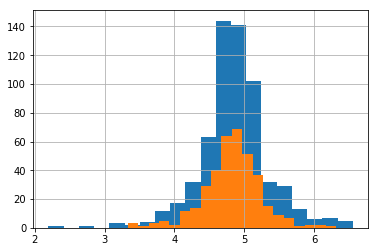

In [22]:
# Combine both incomes as total income and take a log transformation of the same
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])
df_train['LoanAmount_log'].hist(bins=20) 

df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])
df_test['LoanAmount_log'].hist(bins=20) 

In [23]:
# Fill missing data for Loan_Amount_Term with 360
# Fill missing data for Credit_History with 1
df_train['Loan_Amount_Term'].fillna(360, inplace=True)
df_train['Credit_History'].fillna(1, inplace=True)

df_test['Loan_Amount_Term'].fillna(360, inplace=True)
df_test['Credit_History'].fillna(1, inplace=True)

In [24]:
# Check the common values for Dependents
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
# Fill missing data for Dependents with 0 since it's the most common so it's safe
df_train['Dependents'].fillna(0, inplace=True)
df_test['Dependents'].fillna(0, inplace=True)

In [26]:
# Check the common values for Married
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [27]:
# Fill missing data for Married with Yes since it's the most common so it's safe
df_train['Married'].fillna('Yes', inplace=True)
df_test['Married'].fillna('Yes', inplace=True)

In [28]:
# Check the common values for Gender
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [29]:
# Fill missing data for Gender with Male since it's the most common so it's safe
df_train['Gender'].fillna('Male', inplace=True)
df_test['Gender'].fillna('Male', inplace=True)

In [30]:
# Get the number of missing values in each column 
df_train.apply(lambda x: sum(x.isnull()),axis=0) 
df_test.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [31]:
# Now we can start building a predictive model
# Using sklearn requires all inputs to be numeric - change all inputs to be numeric
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i].astype(str))
    
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i].astype(str))

In [32]:
df_train.dtypes
df_test.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [33]:
# Define a generic classification function, which takes a model as input 
# and determines the Accuracy and Cross-Validation scores

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
# Make logistic regression model with 'Credit_History'
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df_train,predictor_var,outcome_var)

# Make test set predictions
test_preds = model.predict(pd.DataFrame([df_test['Credit_History']]).T)

# Create a submission for Analytics Vidhya
submission = pd.DataFrame({"Loan_ID":df_test["Loan_ID"],
                           "Loan_Status":test_preds})

submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save submission to CSV
submission.to_csv('submission.csv',sep=',', index=False)



Accuracy : 80.945%
Cross-Validation Score : 80.946%
